In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4678,ham,Sry da..jst nw only i came to home..,NaN,NaN,NaN
5542,ham,Armand says get your ass over to epsilon,NaN,NaN,NaN
1369,ham,Did you try making another butt.,NaN,NaN,NaN
2057,ham,"Nothing, i got msg frm tht unknown no..",NaN,NaN,NaN
2200,ham,Haha... can... But i'm having dinner with my c...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5461,ham,Ok i thk i got it. Then u wan me 2 come now or...
5353,ham,Guai... ÌÏ shd haf seen him when he's naughty....
182,ham,ok. I am a gentleman and will treat you with d...
5376,ham,I don't want you to leave. But i'm barely doin...
1179,ham,To day class is there are no class.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df["target"] = encoder.fit_transform(df["target"])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df[df.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

In [ ]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
percentage_data = df["target"].value_counts()/df.shape[0] * 100
percentage_data

0    87.366996
1    12.633004
Name: target, dtype: float64

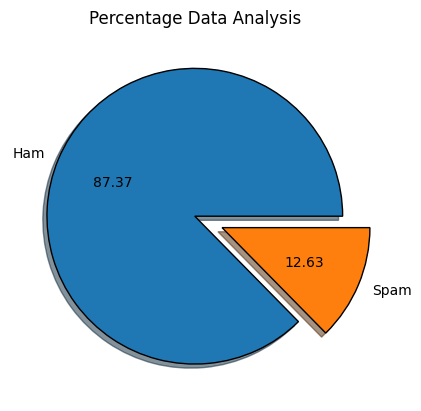

In [ ]:
plt.pie(percentage_data,labels=["Ham","Spam"],autopct='%.2f',explode=[0,0.2],wedgeprops={"edgecolor":"k",'linewidth': 1,'linestyle': '-'},shadow=True)
plt.title("Percentage Data Analysis")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df["text"] = df['text'].str.lower()
df.head()

,target,text
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
df['text'][5]

"freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, å£1.50 to rcv"

In [ ]:
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def punctuation_removal(text):
  return text.translate(str.maketrans('', '', exclude))

In [ ]:
df["removed_punc"] = df["text"].apply(punctuation_removal)
df.head()

,target,text,removed_punc
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [ ]:
df["removed_punc"][2]

'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s'

In [ ]:
df["num_char"] = df["text"].apply(len)
df.head()

,target,text,removed_punc,num_char
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,111
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,49
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61


In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
df["text"].apply(lambda x: nltk.word_tokenize(x))

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, ì_, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,target,text,removed_punc,num_char,num_words
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,111,24
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,29,8
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,155,36
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,49,13
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61,15


In [ ]:
df["num_sent"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,removed_punc,num_char,num_words,num_sent
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,111,24,1
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,29,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61,15,1


In [ ]:
df["num_sent"].value_counts()

1     2768
2     1236
3      629
4      295
5      135
6       59
7       26
8        6
9        5
11       3
10       2
14       1
34       1
17       1
13       1
12       1
Name: num_sent, dtype: int64

In [ ]:
df[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.426001,1.887019
std,58.236293,13.286437,1.374667
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,216.000000,34.000000


In [ ]:
df[df['target']==0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.108282,1.748893
std,56.358207,13.464872,1.309920
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,34.000000


In [ ]:
df[df['target']==1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.539051,2.842266
std,30.137753,6.967305,1.431864
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

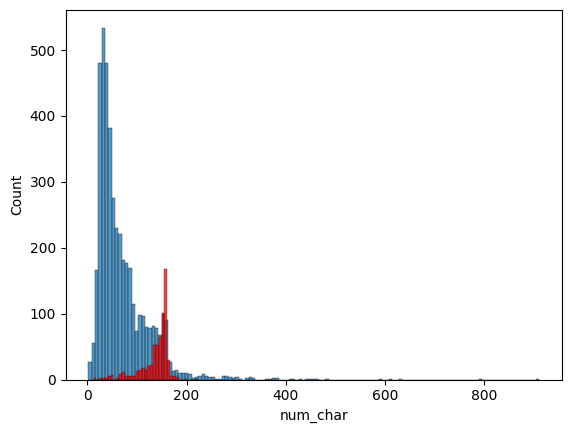

In [ ]:
import seaborn as sns

sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='r')

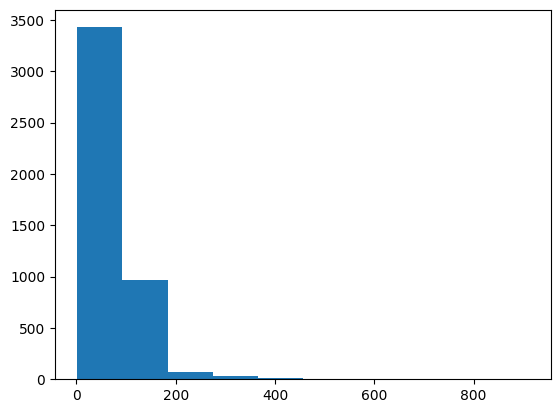

In [ ]:
plt.hist(df[df['target']==0][['num_char']])
plt.show()

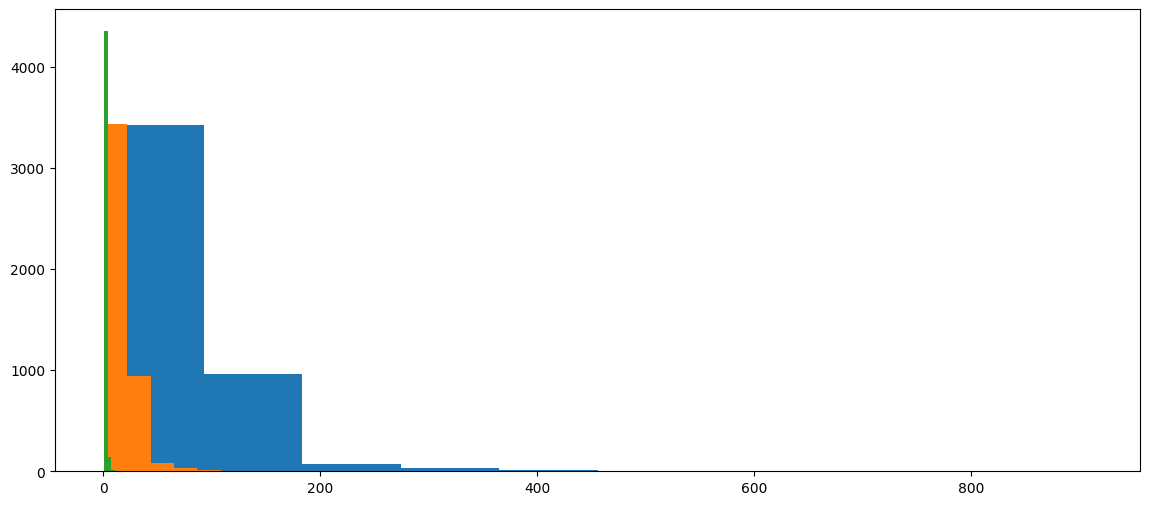

In [ ]:
plt.figure(figsize=(14,6))
plt.hist(df[df['target']==0][['num_char']])
plt.hist(df[df['target']==0][['num_words']])
plt.hist(df[df['target']==0][['num_sent']])
plt.show()

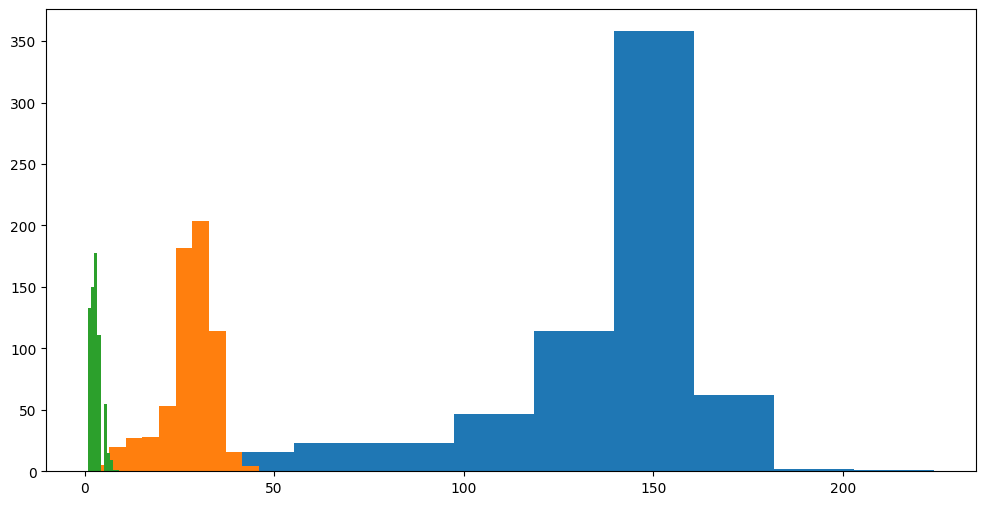

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df[df['target']==1][['num_char']])
plt.hist(df[df['target']==1][['num_words']])
plt.hist(df[df['target']==1][['num_sent']])
plt.show()

<Axes: xlabel='num_words', ylabel='Count'>

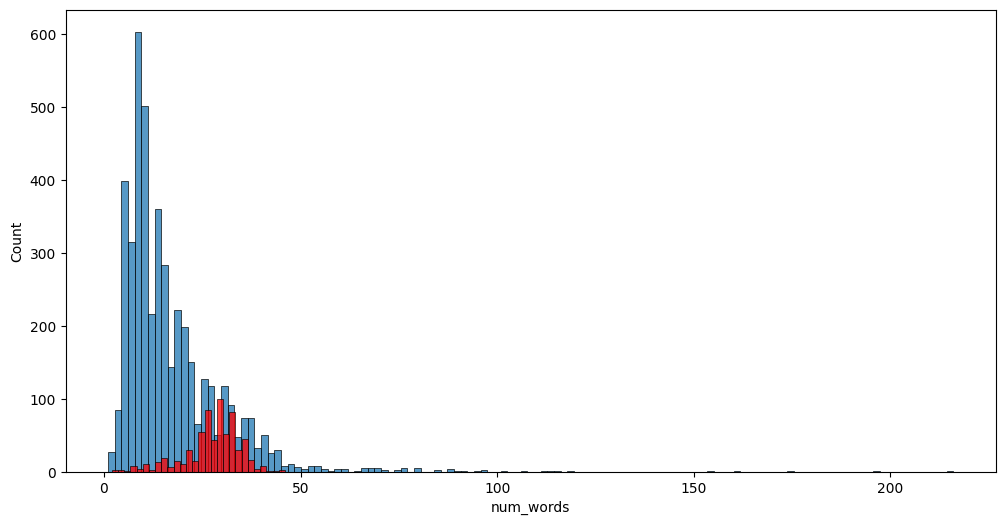

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='r')

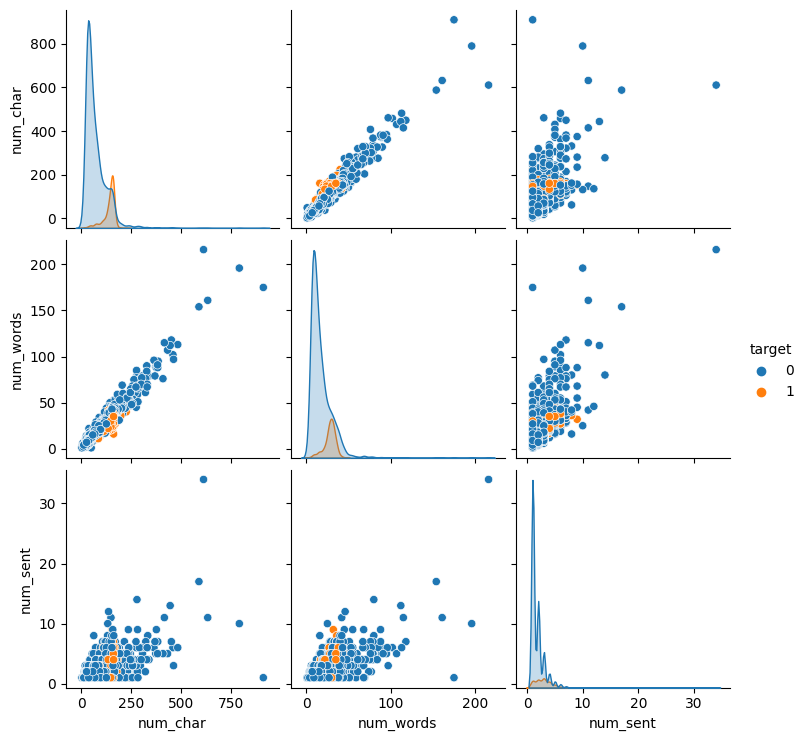

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_char,num_words,num_sent
target,1.000000,0.384717,0.260842,0.264265
num_char,0.384717,1.000000,0.965878,0.609412
num_words,0.260842,0.965878,1.000000,0.659142
num_sent,0.264265,0.609412,0.659142,1.000000


<ipython-input-44-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

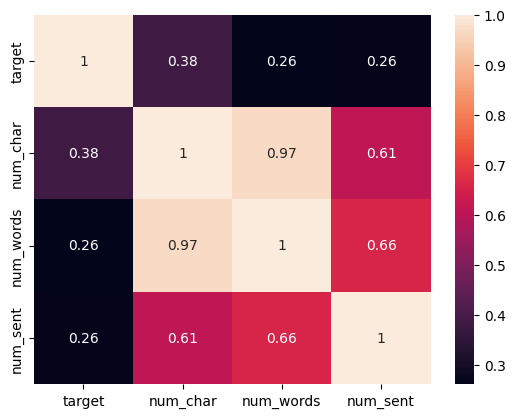

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
df.head()

,target,text,removed_punc,num_char,num_words,num_sent,transformed_text
0,0,"go until jurong point, crazy.. available only ...",go until jurong point crazy available only in ...,111,24,1,go jurong point crazi avail bugi n great world...
1,0,ok lar... joking wif u oni...,ok lar joking wif u oni,29,8,1,ok lar joke wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,155,36,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,49,13,1,u dun say earli hor u c alreadi say
4,0,"nah i don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=1000,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df[df["target"]==1]['transformed_text'].str.cat(sep=' '))

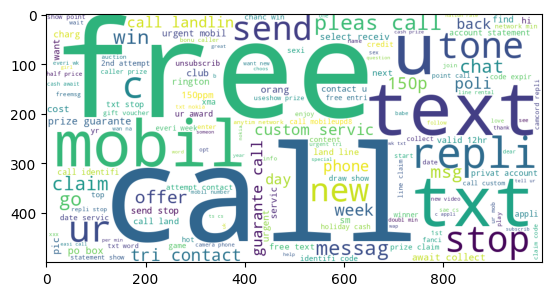

In [ ]:
plt.imshow(spam_wc)

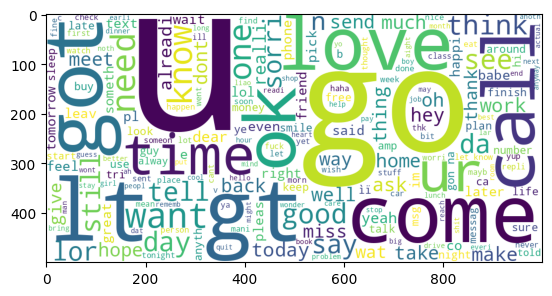

In [ ]:
ham_wc = wc.generate(df[df["target"]==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [ ]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


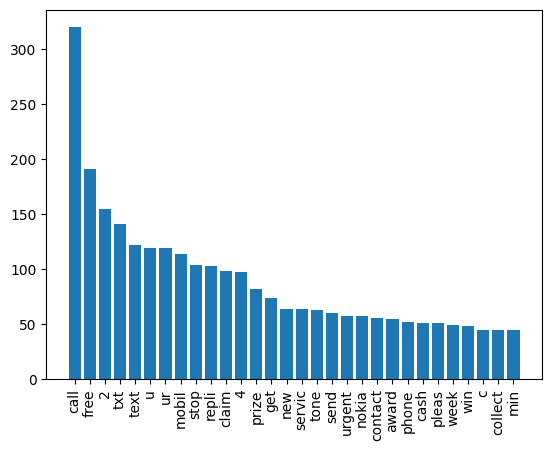

In [ ]:
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [ ]:
len(ham_corpus)

35404

In [ ]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


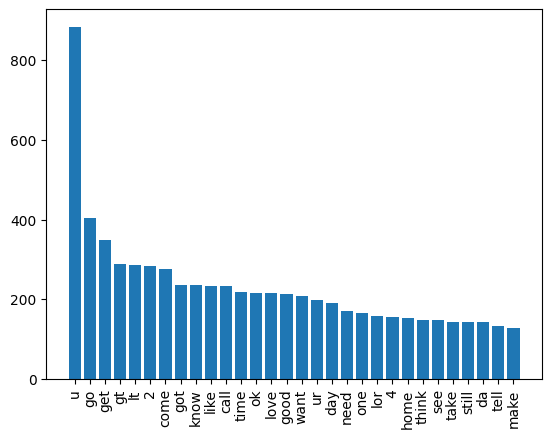

In [ ]:
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

We are using Bag of words here

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df["transformed_text"]).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


TF-idf vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Trying all the other machine learning classifier model to compare results.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid',gamma = 1.0)
knc = KNeighborsClassifier() # going with default value 5
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state=2)
abc = AdaBoostClassifier(n_estimators = 50,random_state=2)
bc = BaggingClassifier(n_estimators = 50,random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state=2)
xgb = XGBClassifier(n_estimators = 50,random_state=2)

In [ ]:
clfs = {
    "SVC" : svc,
    "KN"  : knc,
    "NB"  : mnb,
    "DT"  : dtc,
    "LR"  : lrc,
    "RF"  : rfc,
    "AdaBoost":abc,
    "BgC" : bc,
    "ETC"  : etc,
    "GBDT": gbdt,
    "XGB" : xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

In [ ]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("Name",name)
  print("Accuracy",current_accuracy)
  print("Precision",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

Name SVC
Accuracy 0.9729206963249516
Precision 0.9741379310344828
Name KN
Accuracy 0.9003868471953579
Precision 1.0
Name NB
Accuracy 0.9593810444874274
Precision 1.0
Name DT
Accuracy 0.9352030947775629
Precision 0.8380952380952381
Name LR
Accuracy 0.9516441005802708
Precision 0.94
Name RF
Accuracy 0.971953578336557
Precision 1.0
Name AdaBoost
Accuracy 0.9613152804642167
Precision 0.9454545454545454
Name BgC
Accuracy 0.9584139264990329
Precision 0.8625954198473282
Name ETC
Accuracy 0.9729206963249516
Precision 0.9824561403508771
Name GBDT
Accuracy 0.9526112185686654
Precision 0.9238095238095239
Name XGB
Accuracy 0.9700193423597679
Precision 0.9349593495934959


In [ ]:
performance_df = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithms,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,XGB,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


using max_features in tfidf = 3000

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("Name",name)
  print("Accuracy",current_accuracy)
  print("Precision",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

Name SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
Name KN
Accuracy 0.9052224371373307
Precision 1.0
Name NB
Accuracy 0.9709864603481625
Precision 1.0
Name DT
Accuracy 0.9284332688588007
Precision 0.82
Name LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
Name RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
Name AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
Name BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
Name ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
Name GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
Name XGB
Accuracy 0.9671179883945842
Precision 0.9333333333333333


In [ ]:
performance_df_3000 = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_maxft_3000':accuracy_scores,'Precision_maxft_3000':precision_scores}).sort_values('Precision_maxft_3000',ascending=False)
performance_df_3000

,Algorithms,Accuracy_maxft_3000,Precision_maxft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [ ]:
performance_df.merge(performance_df_3000,on='Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_maxft_3000,Precision_maxft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,XGB,0.970019,0.934959,0.967118,0.933333
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


NOw to see further improvements we are scaling our x vectors and for that we are applying minmaxScaler. here we cannot use standard scaler because it also gives negtive values which are not accepted by naive bayes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()
x = scaler.fit_transform(x)
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

  print("Name",name)
  print("Accuracy",current_accuracy)
  print("Precision",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

Name SVC
Accuracy 0.9690522243713733
Precision 0.9274193548387096
Name KN
Accuracy 0.9052224371373307
Precision 0.9761904761904762
Name NB
Accuracy 0.9787234042553191
Precision 0.9461538461538461
Name DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
Name LR
Accuracy 0.9671179883945842
Precision 0.9642857142857143
Name RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
Name AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
Name BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
Name ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
Name GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
Name XGB
Accuracy 0.9671179883945842
Precision 0.9333333333333333


In [ ]:
performance_df_scaled = pd.DataFrame({'Algorithms':clfs.keys(),'Accuracy_maxft_scaled':accuracy_scores,'Precision_maxft_scaled':precision_scores}).sort_values('Precision_maxft_scaled',ascending=False)
performance_df_scaled

,Algorithms,Accuracy_maxft_scaled,Precision_maxft_scaled
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
10,XGB,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


Final Model Selection

In [ ]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfidf.fit_transform(df["transformed_text"]).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


saving model

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))